# Simple linear regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stat

sns.set()

class LinearRegression(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

## Load the data

In [3]:
data = pd.read_csv('1.01.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [4]:
x = data['SAT']
y = data['GPA']

In [5]:
x.shape

(84,)

In [6]:
y.shape

(84,)

In [7]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Regression itself

In [8]:
reg = LinearRegression()

In [10]:
reg.fit(x_matrix,y)

LinearRegression()

## R-squared

In [12]:
reg.score(x_matrix,y)

0.40600391479679765

## Coefficients

In [14]:
reg.coef_

array([0.00165569])

In [15]:
reg.intercept_

0.275040299660279

## Predictions

In [20]:
reg.predict(np.array([[1740]]))

array([3.15593751])

In [25]:
new_data = pd.DataFrame(data=[1740, 1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [26]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


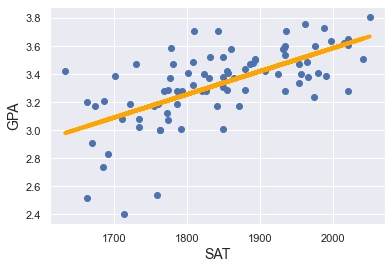

In [28]:
plt.scatter(x,y)
yhat = reg.coef_*x + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c="orange",label="regression line")
plt.xlabel("SAT",fontsize=14)
plt.ylabel("GPA",fontsize=14)
plt.show()